## Model validation on the Iris dataset

In [1]:
#### PACKAGE IMPORTS ####

from numpy.random import seed
seed(8)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection 
%matplotlib inline



from sklearn.model_selection import train_test_split as tts
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, BatchNormalization
from tensorflow.keras.initializers import HeUniform
from tensorflow.keras.initializers import Constant
from tensorflow.keras.regularizers import L2

In [2]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def read_in_and_split_data(iris_data):
    """
    This function takes the Iris dataset as loaded by sklearn.datasets.load_iris(), and then 
    splits so that the training set includes 90% of the full dataset, with the test set 
    making up the remaining 10%.
    Your function should return a tuple (train_data, test_data, train_targets, test_targets) 
    of appropriately split training and test data and targets.
    
    If you would like to import any further packages to aid you in this task, please do so in the 
    Package Imports cell above.
    """
    return tts(iris_data['data'], iris_data['target'], test_size=0.1, random_state=42)
    

In [3]:
# Run your function to generate the test and training data.

iris_data = datasets.load_iris()
train_data, test_data, train_targets, test_targets = read_in_and_split_data(iris_data)

We will now convert the training and test targets using a one hot encoder.

In [4]:
# Convert targets to a one-hot encoding

train_targets = tf.keras.utils.to_categorical(np.array(train_targets))
test_targets = tf.keras.utils.to_categorical(np.array(test_targets))

#### Build the neural network model


* The first layer should be a dense layer with 64 units.
* The weights of the first layer should be initialised with the He uniform initializer.
* The biases of the first layer should be all initially equal to one.
* There should then be a further four dense layers, each with 128 units.
* This should be followed with four dense layers, each with 64 units.
* All of these Dense layers should use the ReLU activation function.
* The output Dense layer should have 3 units and the softmax activation function.

In [5]:
def get_model(input_shape):
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    model = Sequential([
        Dense(64, activation = 'relu', input_shape = input_shape, kernel_initializer=HeUniform(), bias_initializer=Constant(1)),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(3, activation = 'softmax'),
    ])
    return model

In [6]:
# Run your function to get the model
model = get_model(train_data[0].shape)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 64)                4

#### Compile the model

You should now compile the model using the `compile` method. Remember that you need to specify an optimizer, a loss function and a metric to judge the performance of your model.

In [8]:
def compile_model(model):
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with learning rate set to 0.0001), 
    the categorical crossentropy loss function and accuracy as the only metric. 
    Your function doesn't need to return anything; the model will be compiled in-place.
    """
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = tf.keras.losses.CategoricalCrossentropy(), metrics = ['accuracy'])

In [9]:
compile_model(model)

#### Fit the model to the training data

Now you should train the model on the Iris dataset, using the model's `fit` method. 
* Run the training for a fixed number of epochs, given by the function's `epochs` argument.
* Return the training history to be used for plotting the learning curves.
* Set the batch size to 40.
* Set the validation set to be 15% of the training set.

In [10]:
def train_model(model, train_data, train_targets, epochs):
    """
    This function should train the model for the given number of epochs on the 
    train_data and train_targets. 
    Your function should return the training history, as returned by model.fit.
    """
    return model.fit(train_data, train_targets, epochs=epochs, validation_split = .15, batch_size = 40, verbose = 1)   

Run the following cell to run the training for 800 epochs.

In [11]:
# Run your function to train the model

history = train_model(model, train_data, train_targets, epochs=800)

Epoch 1/800
3/3 [==============================] - 3s 345ms/step - loss: 1.1328 - accuracy: 0.3509 - val_loss: 1.1413 - val_accuracy: 0.1905
Epoch 2/800
3/3 [==============================] - 0s 34ms/step - loss: 1.0829 - accuracy: 0.3509 - val_loss: 1.0783 - val_accuracy: 0.1905
Epoch 3/800
3/3 [==============================] - 0s 34ms/step - loss: 1.0417 - accuracy: 0.4825 - val_loss: 1.0228 - val_accuracy: 0.6667
Epoch 4/800
3/3 [==============================] - 0s 37ms/step - loss: 1.0019 - accuracy: 0.6754 - val_loss: 0.9792 - val_accuracy: 0.6667
Epoch 5/800
3/3 [==============================] - 0s 38ms/step - loss: 0.9668 - accuracy: 0.6754 - val_loss: 0.9432 - val_accuracy: 0.6667
Epoch 6/800
3/3 [==============================] - 0s 37ms/step - loss: 0.9352 - accuracy: 0.6754 - val_loss: 0.9142 - val_accuracy: 0.6667
Epoch 7/800
3/3 [==============================] - 0s 34ms/step - loss: 0.9051 - accuracy: 0.6754 - val_loss: 0.8881 - val_accuracy: 0.6667
Epoch 8/800
3/3 [==

3/3 [==============================] - 0s 36ms/step - loss: 0.1340 - accuracy: 0.9649 - val_loss: 0.0559 - val_accuracy: 1.0000
Epoch 60/800
3/3 [==============================] - 0s 37ms/step - loss: 0.1359 - accuracy: 0.9474 - val_loss: 0.0754 - val_accuracy: 1.0000
Epoch 61/800
3/3 [==============================] - 0s 36ms/step - loss: 0.1240 - accuracy: 0.9561 - val_loss: 0.0579 - val_accuracy: 1.0000
Epoch 62/800
3/3 [==============================] - 0s 35ms/step - loss: 0.1222 - accuracy: 0.9649 - val_loss: 0.0507 - val_accuracy: 1.0000
Epoch 63/800
3/3 [==============================] - 0s 37ms/step - loss: 0.1214 - accuracy: 0.9649 - val_loss: 0.0512 - val_accuracy: 1.0000
Epoch 64/800
3/3 [==============================] - 0s 38ms/step - loss: 0.1075 - accuracy: 0.9649 - val_loss: 0.0742 - val_accuracy: 1.0000
Epoch 65/800
3/3 [==============================] - 0s 33ms/step - loss: 0.1170 - accuracy: 0.9561 - val_loss: 0.0535 - val_accuracy: 1.0000
Epoch 66/800
3/3 [========

3/3 [==============================] - 0s 36ms/step - loss: 0.0755 - accuracy: 0.9825 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 118/800
3/3 [==============================] - 0s 38ms/step - loss: 0.0775 - accuracy: 0.9737 - val_loss: 0.0237 - val_accuracy: 1.0000
Epoch 119/800
3/3 [==============================] - 0s 42ms/step - loss: 0.0810 - accuracy: 0.9737 - val_loss: 0.0147 - val_accuracy: 1.0000
Epoch 120/800
3/3 [==============================] - 0s 39ms/step - loss: 0.0750 - accuracy: 0.9825 - val_loss: 0.0182 - val_accuracy: 1.0000
Epoch 121/800
3/3 [==============================] - 0s 37ms/step - loss: 0.0787 - accuracy: 0.9737 - val_loss: 0.0265 - val_accuracy: 1.0000
Epoch 122/800
3/3 [==============================] - 0s 36ms/step - loss: 0.0751 - accuracy: 0.9737 - val_loss: 0.0173 - val_accuracy: 1.0000
Epoch 123/800
3/3 [==============================] - 0s 33ms/step - loss: 0.0719 - accuracy: 0.9825 - val_loss: 0.0150 - val_accuracy: 1.0000
Epoch 124/800
3/3 [=

Epoch 175/800
3/3 [==============================] - 0s 26ms/step - loss: 0.0657 - accuracy: 0.9825 - val_loss: 0.0130 - val_accuracy: 1.0000
Epoch 176/800
3/3 [==============================] - 0s 28ms/step - loss: 0.0620 - accuracy: 0.9825 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 177/800
3/3 [==============================] - 0s 32ms/step - loss: 0.0644 - accuracy: 0.9737 - val_loss: 0.0142 - val_accuracy: 1.0000
Epoch 178/800
3/3 [==============================] - 0s 25ms/step - loss: 0.0607 - accuracy: 0.9912 - val_loss: 0.0212 - val_accuracy: 1.0000
Epoch 179/800
3/3 [==============================] - 0s 30ms/step - loss: 0.0638 - accuracy: 0.9737 - val_loss: 0.0199 - val_accuracy: 1.0000
Epoch 180/800
3/3 [==============================] - 0s 29ms/step - loss: 0.0661 - accuracy: 0.9825 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 181/800
3/3 [==============================] - 0s 36ms/step - loss: 0.0621 - accuracy: 0.9825 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 

Epoch 233/800
3/3 [==============================] - 0s 36ms/step - loss: 0.0675 - accuracy: 0.9737 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 234/800
3/3 [==============================] - 0s 36ms/step - loss: 0.0572 - accuracy: 0.9825 - val_loss: 0.0230 - val_accuracy: 1.0000
Epoch 235/800
3/3 [==============================] - 0s 39ms/step - loss: 0.0577 - accuracy: 0.9825 - val_loss: 0.0256 - val_accuracy: 1.0000
Epoch 236/800
3/3 [==============================] - 0s 36ms/step - loss: 0.0581 - accuracy: 0.9825 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 237/800
3/3 [==============================] - 0s 35ms/step - loss: 0.0582 - accuracy: 0.9825 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 238/800
3/3 [==============================] - 0s 39ms/step - loss: 0.0552 - accuracy: 0.9825 - val_loss: 0.0222 - val_accuracy: 1.0000
Epoch 239/800
3/3 [==============================] - 0s 38ms/step - loss: 0.0634 - accuracy: 0.9649 - val_loss: 0.0218 - val_accuracy: 1.0000
Epoch 

Epoch 291/800
3/3 [==============================] - 0s 30ms/step - loss: 0.0578 - accuracy: 0.9825 - val_loss: 0.0362 - val_accuracy: 1.0000
Epoch 292/800
3/3 [==============================] - 0s 37ms/step - loss: 0.0585 - accuracy: 0.9737 - val_loss: 0.0173 - val_accuracy: 1.0000
Epoch 293/800
3/3 [==============================] - 0s 43ms/step - loss: 0.0575 - accuracy: 0.9825 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 294/800
3/3 [==============================] - 0s 39ms/step - loss: 0.0644 - accuracy: 0.9737 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 295/800
3/3 [==============================] - 0s 35ms/step - loss: 0.0518 - accuracy: 0.9912 - val_loss: 0.0430 - val_accuracy: 1.0000
Epoch 296/800
3/3 [==============================] - 0s 38ms/step - loss: 0.0698 - accuracy: 0.9649 - val_loss: 0.0181 - val_accuracy: 1.0000
Epoch 297/800
3/3 [==============================] - 0s 39ms/step - loss: 0.0581 - accuracy: 0.9825 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 

Epoch 349/800
3/3 [==============================] - 0s 35ms/step - loss: 0.0697 - accuracy: 0.9561 - val_loss: 0.0159 - val_accuracy: 1.0000
Epoch 350/800
3/3 [==============================] - 0s 34ms/step - loss: 0.0533 - accuracy: 0.9912 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 351/800
3/3 [==============================] - 0s 39ms/step - loss: 0.0636 - accuracy: 0.9737 - val_loss: 0.0141 - val_accuracy: 1.0000
Epoch 352/800
3/3 [==============================] - 0s 37ms/step - loss: 0.0470 - accuracy: 0.9825 - val_loss: 0.0321 - val_accuracy: 1.0000
Epoch 353/800
3/3 [==============================] - 0s 34ms/step - loss: 0.0537 - accuracy: 0.9825 - val_loss: 0.0261 - val_accuracy: 1.0000
Epoch 354/800
3/3 [==============================] - 0s 34ms/step - loss: 0.0573 - accuracy: 0.9825 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 355/800
3/3 [==============================] - 0s 38ms/step - loss: 0.0644 - accuracy: 0.9737 - val_loss: 0.0232 - val_accuracy: 1.0000
Epoch 

Epoch 407/800
3/3 [==============================] - 0s 30ms/step - loss: 0.0492 - accuracy: 0.9912 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 408/800
3/3 [==============================] - 0s 25ms/step - loss: 0.0459 - accuracy: 0.9912 - val_loss: 0.0208 - val_accuracy: 1.0000
Epoch 409/800
3/3 [==============================] - 0s 28ms/step - loss: 0.0506 - accuracy: 0.9825 - val_loss: 0.0163 - val_accuracy: 1.0000
Epoch 410/800
3/3 [==============================] - 0s 30ms/step - loss: 0.0470 - accuracy: 0.9912 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 411/800
3/3 [==============================] - 0s 33ms/step - loss: 0.0531 - accuracy: 0.9825 - val_loss: 0.0208 - val_accuracy: 1.0000
Epoch 412/800
3/3 [==============================] - 0s 35ms/step - loss: 0.0466 - accuracy: 0.9825 - val_loss: 0.0166 - val_accuracy: 1.0000
Epoch 413/800
3/3 [==============================] - 0s 32ms/step - loss: 0.0473 - accuracy: 0.9912 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 

Epoch 465/800
3/3 [==============================] - 0s 34ms/step - loss: 0.0539 - accuracy: 0.9737 - val_loss: 0.0151 - val_accuracy: 1.0000
Epoch 466/800
3/3 [==============================] - 0s 38ms/step - loss: 0.0590 - accuracy: 0.9737 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 467/800
3/3 [==============================] - 0s 34ms/step - loss: 0.0507 - accuracy: 0.9825 - val_loss: 0.0270 - val_accuracy: 1.0000
Epoch 468/800
3/3 [==============================] - 0s 44ms/step - loss: 0.0509 - accuracy: 0.9737 - val_loss: 0.0304 - val_accuracy: 1.0000
Epoch 469/800
3/3 [==============================] - 0s 37ms/step - loss: 0.0580 - accuracy: 0.9737 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 470/800
3/3 [==============================] - 0s 29ms/step - loss: 0.0497 - accuracy: 0.9825 - val_loss: 0.0198 - val_accuracy: 1.0000
Epoch 471/800
3/3 [==============================] - 0s 33ms/step - loss: 0.0474 - accuracy: 0.9825 - val_loss: 0.0203 - val_accuracy: 1.0000
Epoch 

Epoch 523/800
3/3 [==============================] - 0s 36ms/step - loss: 0.0443 - accuracy: 0.9825 - val_loss: 0.0344 - val_accuracy: 1.0000
Epoch 524/800
3/3 [==============================] - 0s 35ms/step - loss: 0.0536 - accuracy: 0.9825 - val_loss: 0.0170 - val_accuracy: 1.0000
Epoch 525/800
3/3 [==============================] - 0s 38ms/step - loss: 0.0435 - accuracy: 0.9912 - val_loss: 0.0183 - val_accuracy: 1.0000
Epoch 526/800
3/3 [==============================] - 0s 43ms/step - loss: 0.0519 - accuracy: 0.9825 - val_loss: 0.0235 - val_accuracy: 1.0000
Epoch 527/800
3/3 [==============================] - 0s 37ms/step - loss: 0.0431 - accuracy: 0.9912 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 528/800
3/3 [==============================] - 0s 36ms/step - loss: 0.0467 - accuracy: 0.9825 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 529/800
3/3 [==============================] - 0s 36ms/step - loss: 0.0427 - accuracy: 0.9912 - val_loss: 0.0193 - val_accuracy: 1.0000
Epoch 

Epoch 581/800
3/3 [==============================] - 0s 36ms/step - loss: 0.0401 - accuracy: 0.9912 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 582/800
3/3 [==============================] - 0s 39ms/step - loss: 0.0458 - accuracy: 0.9825 - val_loss: 0.0142 - val_accuracy: 1.0000
Epoch 583/800
3/3 [==============================] - 0s 37ms/step - loss: 0.0479 - accuracy: 0.9825 - val_loss: 0.0287 - val_accuracy: 1.0000
Epoch 584/800
3/3 [==============================] - 0s 43ms/step - loss: 0.0461 - accuracy: 0.9825 - val_loss: 0.0147 - val_accuracy: 1.0000
Epoch 585/800
3/3 [==============================] - 0s 36ms/step - loss: 0.0417 - accuracy: 0.9912 - val_loss: 0.0153 - val_accuracy: 1.0000
Epoch 586/800
3/3 [==============================] - 0s 34ms/step - loss: 0.0402 - accuracy: 0.9912 - val_loss: 0.0200 - val_accuracy: 1.0000
Epoch 587/800
3/3 [==============================] - 0s 33ms/step - loss: 0.0425 - accuracy: 0.9825 - val_loss: 0.0183 - val_accuracy: 1.0000
Epoch 

Epoch 639/800
3/3 [==============================] - 0s 37ms/step - loss: 0.0391 - accuracy: 0.9912 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 640/800
3/3 [==============================] - 0s 36ms/step - loss: 0.0395 - accuracy: 0.9825 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 641/800
3/3 [==============================] - 0s 29ms/step - loss: 0.0459 - accuracy: 0.9825 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 642/800
3/3 [==============================] - 0s 40ms/step - loss: 0.0407 - accuracy: 0.9912 - val_loss: 0.0308 - val_accuracy: 1.0000
Epoch 643/800
3/3 [==============================] - 0s 33ms/step - loss: 0.0462 - accuracy: 0.9737 - val_loss: 0.0184 - val_accuracy: 1.0000
Epoch 644/800
3/3 [==============================] - 0s 43ms/step - loss: 0.0388 - accuracy: 0.9912 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 645/800
3/3 [==============================] - 0s 40ms/step - loss: 0.0423 - accuracy: 0.9912 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 

Epoch 697/800
3/3 [==============================] - 0s 39ms/step - loss: 0.0376 - accuracy: 0.9825 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 698/800
3/3 [==============================] - 0s 40ms/step - loss: 0.0373 - accuracy: 0.9912 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 699/800
3/3 [==============================] - 0s 36ms/step - loss: 0.0403 - accuracy: 0.9912 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 700/800
3/3 [==============================] - 0s 44ms/step - loss: 0.0372 - accuracy: 0.9912 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 701/800
3/3 [==============================] - 0s 41ms/step - loss: 0.0417 - accuracy: 0.9825 - val_loss: 0.0226 - val_accuracy: 1.0000
Epoch 702/800
3/3 [==============================] - 0s 37ms/step - loss: 0.0381 - accuracy: 0.9825 - val_loss: 0.0130 - val_accuracy: 1.0000
Epoch 703/800
3/3 [==============================] - 0s 35ms/step - loss: 0.0440 - accuracy: 0.9912 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 

Epoch 755/800
3/3 [==============================] - 0s 34ms/step - loss: 0.0463 - accuracy: 0.9825 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 756/800
3/3 [==============================] - 0s 35ms/step - loss: 0.0400 - accuracy: 0.9912 - val_loss: 0.0338 - val_accuracy: 1.0000
Epoch 757/800
3/3 [==============================] - 0s 38ms/step - loss: 0.0503 - accuracy: 0.9737 - val_loss: 0.0143 - val_accuracy: 1.0000
Epoch 758/800
3/3 [==============================] - 0s 41ms/step - loss: 0.0454 - accuracy: 0.9912 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 759/800
3/3 [==============================] - 0s 39ms/step - loss: 0.0457 - accuracy: 0.9825 - val_loss: 0.0265 - val_accuracy: 1.0000
Epoch 760/800
3/3 [==============================] - 0s 39ms/step - loss: 0.0403 - accuracy: 0.9825 - val_loss: 0.0226 - val_accuracy: 1.0000
Epoch 761/800
3/3 [==============================] - 0s 41ms/step - loss: 0.0340 - accuracy: 0.9912 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 

#### Plot the learning curves

We will now plot two graphs:
* Epoch vs accuracy
* Epoch vs loss


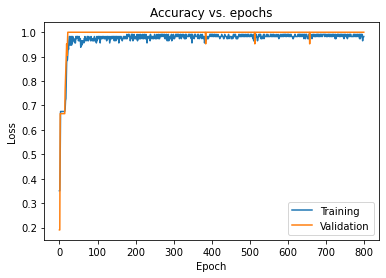

In [12]:
# Run this cell to plot the epoch vs accuracy graph

try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

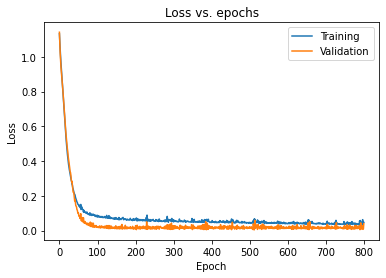

In [13]:
#Run this cell to plot the epoch vs loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

Oh no! We have overfit our dataset. You should now try to now try to mitigate this overfitting.

#### Reducing overfitting in the model

You should now define a new regularised model.
The specs for the regularised model are the same as our original model, with the addition of two dropout layers, weight decay, and a batch normalisation layer. 

In particular:

* Add a dropout layer after the 3rd Dense layer
* Then there should be two more Dense layers with 128 units before a batch normalisation layer
* Following this, two more Dense layers with 64 units and then another Dropout layer
* Two more Dense layers with 64 units and then the final 3-way softmax layer
* Add weight decay (l2 kernel regularisation) in all Dense layers except the final softmax layer

In [14]:
def get_regularised_model(input_shape, dropout_rate, weight_decay):
    """
    This function should build a regularised Sequential model according to the above specification. 
    The dropout_rate argument in the function should be used to set the Dropout rate for all Dropout layers.
    L2 kernel regularisation (weight decay) should be added using the weight_decay argument to 
    set the weight decay coefficient in all Dense layers that use L2 regularisation.
    Ensure the weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument input_shape.
    Your function should return the model.
    """
    
    model = Sequential([
        Dense(64, activation = 'relu', input_shape = input_shape, kernel_initializer=HeUniform(), bias_initializer=Constant(1), kernel_regularizer=L2(weight_decay)),
        Dense(128, activation = 'relu', kernel_regularizer=L2(weight_decay)),
        Dense(128, activation = 'relu', kernel_regularizer=L2(weight_decay)),
        Dropout(dropout_rate),
        Dense(128, activation = 'relu', kernel_regularizer=L2(weight_decay)),
        Dense(128, activation = 'relu', kernel_regularizer=L2(weight_decay)),
        BatchNormalization(),
        Dense(64, activation = 'relu', kernel_regularizer=L2(weight_decay)),
        Dense(64, activation = 'relu', kernel_regularizer=L2(weight_decay)),
        Dropout(dropout_rate),
        Dense(64, activation = 'relu', kernel_regularizer=L2(weight_decay)),
        Dense(64, activation = 'relu', kernel_regularizer=L2(weight_decay)),
        Dense(3, activation = 'softmax'),
    ])
    return model

#### Instantiate, compile and train the model

In [15]:
reg_model = get_regularised_model(train_data[0].shape, 0.3, 0.001)

In [16]:
reg_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                320       
                                                                 
 dense_11 (Dense)            (None, 128)               8320      
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization (BatchN  (None, 128)             

In [17]:
compile_model(reg_model)

In [18]:
reg_history = train_model(reg_model, train_data, train_targets, epochs=800)

Epoch 1/800
3/3 [==============================] - 4s 386ms/step - loss: 2.0841 - accuracy: 0.3158 - val_loss: 1.9791 - val_accuracy: 0.3333
Epoch 2/800
3/3 [==============================] - 0s 36ms/step - loss: 2.0350 - accuracy: 0.3421 - val_loss: 1.9614 - val_accuracy: 0.3333
Epoch 3/800
3/3 [==============================] - 0s 38ms/step - loss: 2.0237 - accuracy: 0.3333 - val_loss: 1.9483 - val_accuracy: 0.3333
Epoch 4/800
3/3 [==============================] - 0s 35ms/step - loss: 1.9729 - accuracy: 0.3860 - val_loss: 1.9343 - val_accuracy: 0.3333
Epoch 5/800
3/3 [==============================] - 0s 36ms/step - loss: 2.0017 - accuracy: 0.3772 - val_loss: 1.9240 - val_accuracy: 0.3333
Epoch 6/800
3/3 [==============================] - 0s 39ms/step - loss: 1.9452 - accuracy: 0.3947 - val_loss: 1.9126 - val_accuracy: 0.7143
Epoch 7/800
3/3 [==============================] - 0s 43ms/step - loss: 1.9953 - accuracy: 0.3860 - val_loss: 1.9000 - val_accuracy: 0.5714
Epoch 8/800
3/3 [==

3/3 [==============================] - 0s 40ms/step - loss: 1.3144 - accuracy: 0.7281 - val_loss: 1.3023 - val_accuracy: 0.6667
Epoch 60/800
3/3 [==============================] - 0s 36ms/step - loss: 1.2924 - accuracy: 0.7544 - val_loss: 1.2950 - val_accuracy: 0.6667
Epoch 61/800
3/3 [==============================] - 0s 38ms/step - loss: 1.3011 - accuracy: 0.7807 - val_loss: 1.2875 - val_accuracy: 0.6667
Epoch 62/800
3/3 [==============================] - 0s 38ms/step - loss: 1.2780 - accuracy: 0.7719 - val_loss: 1.2800 - val_accuracy: 0.6667
Epoch 63/800
3/3 [==============================] - 0s 38ms/step - loss: 1.2802 - accuracy: 0.7895 - val_loss: 1.2729 - val_accuracy: 0.6667
Epoch 64/800
3/3 [==============================] - 0s 37ms/step - loss: 1.2682 - accuracy: 0.7719 - val_loss: 1.2662 - val_accuracy: 0.6667
Epoch 65/800
3/3 [==============================] - 0s 39ms/step - loss: 1.2585 - accuracy: 0.8421 - val_loss: 1.2586 - val_accuracy: 0.7143
Epoch 66/800
3/3 [========

3/3 [==============================] - 0s 41ms/step - loss: 0.9533 - accuracy: 0.9474 - val_loss: 0.9715 - val_accuracy: 0.9524
Epoch 118/800
3/3 [==============================] - 0s 37ms/step - loss: 0.9238 - accuracy: 0.9298 - val_loss: 0.9863 - val_accuracy: 0.9048
Epoch 119/800
3/3 [==============================] - 0s 34ms/step - loss: 0.9623 - accuracy: 0.9298 - val_loss: 0.9637 - val_accuracy: 0.9524
Epoch 120/800
3/3 [==============================] - 0s 41ms/step - loss: 0.9332 - accuracy: 0.9474 - val_loss: 0.9358 - val_accuracy: 0.9524
Epoch 121/800
3/3 [==============================] - 0s 39ms/step - loss: 0.9113 - accuracy: 0.9561 - val_loss: 0.9344 - val_accuracy: 0.9524
Epoch 122/800
3/3 [==============================] - 0s 35ms/step - loss: 0.9448 - accuracy: 0.9386 - val_loss: 0.9184 - val_accuracy: 0.9524
Epoch 123/800
3/3 [==============================] - 0s 37ms/step - loss: 0.9597 - accuracy: 0.9123 - val_loss: 0.9234 - val_accuracy: 0.9524
Epoch 124/800
3/3 [=

Epoch 175/800
3/3 [==============================] - 0s 38ms/step - loss: 0.8517 - accuracy: 0.9474 - val_loss: 0.8249 - val_accuracy: 0.9524
Epoch 176/800
3/3 [==============================] - 0s 37ms/step - loss: 0.7902 - accuracy: 0.9825 - val_loss: 0.8132 - val_accuracy: 0.9524
Epoch 177/800
3/3 [==============================] - 0s 36ms/step - loss: 0.8209 - accuracy: 0.9737 - val_loss: 0.8070 - val_accuracy: 0.9524
Epoch 178/800
3/3 [==============================] - 0s 38ms/step - loss: 0.7765 - accuracy: 0.9825 - val_loss: 0.7987 - val_accuracy: 0.9524
Epoch 179/800
3/3 [==============================] - 0s 42ms/step - loss: 0.7983 - accuracy: 0.9825 - val_loss: 0.7874 - val_accuracy: 0.9524
Epoch 180/800
3/3 [==============================] - 0s 38ms/step - loss: 0.8241 - accuracy: 0.9561 - val_loss: 0.7825 - val_accuracy: 0.9524
Epoch 181/800
3/3 [==============================] - 0s 38ms/step - loss: 0.8821 - accuracy: 0.9386 - val_loss: 0.7827 - val_accuracy: 0.9524
Epoch 

Epoch 233/800
3/3 [==============================] - 0s 37ms/step - loss: 0.7604 - accuracy: 0.9737 - val_loss: 0.7145 - val_accuracy: 1.0000
Epoch 234/800
3/3 [==============================] - 0s 36ms/step - loss: 0.8066 - accuracy: 0.9561 - val_loss: 0.7193 - val_accuracy: 1.0000
Epoch 235/800
3/3 [==============================] - 0s 41ms/step - loss: 0.7660 - accuracy: 0.9737 - val_loss: 0.7189 - val_accuracy: 1.0000
Epoch 236/800
3/3 [==============================] - 0s 34ms/step - loss: 0.7807 - accuracy: 0.9649 - val_loss: 0.7108 - val_accuracy: 1.0000
Epoch 237/800
3/3 [==============================] - 0s 36ms/step - loss: 0.7695 - accuracy: 0.9737 - val_loss: 0.7187 - val_accuracy: 1.0000
Epoch 238/800
3/3 [==============================] - 0s 30ms/step - loss: 0.7871 - accuracy: 0.9474 - val_loss: 0.7267 - val_accuracy: 0.9524
Epoch 239/800
3/3 [==============================] - 0s 33ms/step - loss: 0.7498 - accuracy: 0.9825 - val_loss: 0.7373 - val_accuracy: 0.9524
Epoch 

Epoch 291/800
3/3 [==============================] - 0s 35ms/step - loss: 0.7497 - accuracy: 0.9649 - val_loss: 0.7244 - val_accuracy: 0.9524
Epoch 292/800
3/3 [==============================] - 0s 38ms/step - loss: 0.7115 - accuracy: 0.9737 - val_loss: 0.7654 - val_accuracy: 0.9524
Epoch 293/800
3/3 [==============================] - 0s 43ms/step - loss: 0.7329 - accuracy: 0.9737 - val_loss: 0.8058 - val_accuracy: 0.9524
Epoch 294/800
3/3 [==============================] - 0s 40ms/step - loss: 0.7353 - accuracy: 0.9737 - val_loss: 0.8256 - val_accuracy: 0.9524
Epoch 295/800
3/3 [==============================] - 0s 43ms/step - loss: 0.7639 - accuracy: 0.9561 - val_loss: 0.7902 - val_accuracy: 0.9524
Epoch 296/800
3/3 [==============================] - 0s 38ms/step - loss: 0.7148 - accuracy: 0.9649 - val_loss: 0.7293 - val_accuracy: 0.9524
Epoch 297/800
3/3 [==============================] - 0s 37ms/step - loss: 0.7141 - accuracy: 0.9912 - val_loss: 0.6896 - val_accuracy: 1.0000
Epoch 

Epoch 349/800
3/3 [==============================] - 0s 33ms/step - loss: 0.7093 - accuracy: 0.9825 - val_loss: 0.6822 - val_accuracy: 1.0000
Epoch 350/800
3/3 [==============================] - 0s 34ms/step - loss: 0.6842 - accuracy: 0.9737 - val_loss: 0.6886 - val_accuracy: 0.9524
Epoch 351/800
3/3 [==============================] - 0s 37ms/step - loss: 0.6755 - accuracy: 0.9825 - val_loss: 0.6838 - val_accuracy: 0.9524
Epoch 352/800
3/3 [==============================] - 0s 38ms/step - loss: 0.6974 - accuracy: 0.9649 - val_loss: 0.6779 - val_accuracy: 1.0000
Epoch 353/800
3/3 [==============================] - 0s 36ms/step - loss: 0.7000 - accuracy: 0.9737 - val_loss: 0.6659 - val_accuracy: 1.0000
Epoch 354/800
3/3 [==============================] - 0s 36ms/step - loss: 0.6818 - accuracy: 0.9912 - val_loss: 0.6594 - val_accuracy: 1.0000
Epoch 355/800
3/3 [==============================] - 0s 36ms/step - loss: 0.6981 - accuracy: 0.9825 - val_loss: 0.6559 - val_accuracy: 1.0000
Epoch 

Epoch 407/800
3/3 [==============================] - 0s 40ms/step - loss: 0.6620 - accuracy: 0.9825 - val_loss: 0.6829 - val_accuracy: 0.9524
Epoch 408/800
3/3 [==============================] - 0s 43ms/step - loss: 0.6663 - accuracy: 0.9912 - val_loss: 0.6995 - val_accuracy: 0.9524
Epoch 409/800
3/3 [==============================] - 0s 37ms/step - loss: 0.6560 - accuracy: 0.9737 - val_loss: 0.6991 - val_accuracy: 0.9524
Epoch 410/800
3/3 [==============================] - 0s 38ms/step - loss: 0.6774 - accuracy: 0.9825 - val_loss: 0.6641 - val_accuracy: 0.9524
Epoch 411/800
3/3 [==============================] - 0s 38ms/step - loss: 0.6434 - accuracy: 0.9912 - val_loss: 0.6521 - val_accuracy: 0.9524
Epoch 412/800
3/3 [==============================] - 0s 36ms/step - loss: 0.6598 - accuracy: 0.9825 - val_loss: 0.6614 - val_accuracy: 0.9524
Epoch 413/800
3/3 [==============================] - 0s 40ms/step - loss: 0.6472 - accuracy: 0.9912 - val_loss: 0.6725 - val_accuracy: 0.9524
Epoch 

Epoch 465/800
3/3 [==============================] - 0s 36ms/step - loss: 0.6328 - accuracy: 0.9737 - val_loss: 0.6170 - val_accuracy: 1.0000
Epoch 466/800
3/3 [==============================] - 0s 35ms/step - loss: 0.6229 - accuracy: 0.9825 - val_loss: 0.6171 - val_accuracy: 1.0000
Epoch 467/800
3/3 [==============================] - 0s 37ms/step - loss: 0.6467 - accuracy: 0.9825 - val_loss: 0.6341 - val_accuracy: 1.0000
Epoch 468/800
3/3 [==============================] - 0s 37ms/step - loss: 0.6373 - accuracy: 0.9825 - val_loss: 0.6630 - val_accuracy: 0.9524
Epoch 469/800
3/3 [==============================] - 0s 38ms/step - loss: 0.6236 - accuracy: 0.9912 - val_loss: 0.6737 - val_accuracy: 0.9524
Epoch 470/800
3/3 [==============================] - 0s 38ms/step - loss: 0.6633 - accuracy: 0.9825 - val_loss: 0.6856 - val_accuracy: 0.9524
Epoch 471/800
3/3 [==============================] - 0s 35ms/step - loss: 0.6163 - accuracy: 0.9912 - val_loss: 0.6808 - val_accuracy: 0.9524
Epoch 

Epoch 523/800
3/3 [==============================] - 0s 45ms/step - loss: 0.6208 - accuracy: 0.9737 - val_loss: 0.6790 - val_accuracy: 0.9524
Epoch 524/800
3/3 [==============================] - 0s 37ms/step - loss: 0.5977 - accuracy: 0.9912 - val_loss: 0.6763 - val_accuracy: 0.9524
Epoch 525/800
3/3 [==============================] - 0s 36ms/step - loss: 0.6080 - accuracy: 0.9912 - val_loss: 0.6871 - val_accuracy: 0.9524
Epoch 526/800
3/3 [==============================] - 0s 31ms/step - loss: 0.6406 - accuracy: 0.9737 - val_loss: 0.6937 - val_accuracy: 0.9524
Epoch 527/800
3/3 [==============================] - 0s 29ms/step - loss: 0.6123 - accuracy: 0.9737 - val_loss: 0.6855 - val_accuracy: 0.9524
Epoch 528/800
3/3 [==============================] - 0s 33ms/step - loss: 0.6062 - accuracy: 0.9825 - val_loss: 0.7071 - val_accuracy: 0.9524
Epoch 529/800
3/3 [==============================] - 0s 30ms/step - loss: 0.6143 - accuracy: 0.9737 - val_loss: 0.6946 - val_accuracy: 0.9524
Epoch 

Epoch 581/800
3/3 [==============================] - 0s 39ms/step - loss: 0.6201 - accuracy: 0.9825 - val_loss: 0.5819 - val_accuracy: 1.0000
Epoch 582/800
3/3 [==============================] - 0s 35ms/step - loss: 0.6106 - accuracy: 0.9825 - val_loss: 0.6033 - val_accuracy: 1.0000
Epoch 583/800
3/3 [==============================] - 0s 38ms/step - loss: 0.6106 - accuracy: 0.9912 - val_loss: 0.6454 - val_accuracy: 0.9524
Epoch 584/800
3/3 [==============================] - 0s 36ms/step - loss: 0.5796 - accuracy: 0.9912 - val_loss: 0.6677 - val_accuracy: 0.9524
Epoch 585/800
3/3 [==============================] - 0s 38ms/step - loss: 0.6084 - accuracy: 0.9825 - val_loss: 0.6282 - val_accuracy: 0.9524
Epoch 586/800
3/3 [==============================] - 0s 38ms/step - loss: 0.5841 - accuracy: 0.9912 - val_loss: 0.6055 - val_accuracy: 0.9524
Epoch 587/800
3/3 [==============================] - 0s 38ms/step - loss: 0.6081 - accuracy: 0.9561 - val_loss: 0.5911 - val_accuracy: 1.0000
Epoch 

Epoch 639/800
3/3 [==============================] - 0s 34ms/step - loss: 0.5889 - accuracy: 0.9912 - val_loss: 0.7517 - val_accuracy: 0.9524
Epoch 640/800
3/3 [==============================] - 0s 35ms/step - loss: 0.5854 - accuracy: 0.9825 - val_loss: 0.7126 - val_accuracy: 0.9524
Epoch 641/800
3/3 [==============================] - 0s 34ms/step - loss: 0.5850 - accuracy: 0.9825 - val_loss: 0.6890 - val_accuracy: 0.9524
Epoch 642/800
3/3 [==============================] - 0s 33ms/step - loss: 0.5968 - accuracy: 0.9737 - val_loss: 0.6351 - val_accuracy: 0.9524
Epoch 643/800
3/3 [==============================] - 0s 32ms/step - loss: 0.5777 - accuracy: 0.9825 - val_loss: 0.6011 - val_accuracy: 0.9524
Epoch 644/800
3/3 [==============================] - 0s 31ms/step - loss: 0.6182 - accuracy: 0.9737 - val_loss: 0.5902 - val_accuracy: 0.9524
Epoch 645/800
3/3 [==============================] - 0s 28ms/step - loss: 0.6017 - accuracy: 0.9737 - val_loss: 0.5739 - val_accuracy: 1.0000
Epoch 

Epoch 697/800
3/3 [==============================] - 0s 43ms/step - loss: 0.5534 - accuracy: 0.9912 - val_loss: 0.7088 - val_accuracy: 0.9524
Epoch 698/800
3/3 [==============================] - 0s 38ms/step - loss: 0.5784 - accuracy: 0.9825 - val_loss: 0.6619 - val_accuracy: 0.9524
Epoch 699/800
3/3 [==============================] - 0s 40ms/step - loss: 0.5777 - accuracy: 0.9825 - val_loss: 0.6271 - val_accuracy: 0.9524
Epoch 700/800
3/3 [==============================] - 0s 37ms/step - loss: 0.5682 - accuracy: 0.9737 - val_loss: 0.6904 - val_accuracy: 0.9524
Epoch 701/800
3/3 [==============================] - 0s 38ms/step - loss: 0.5631 - accuracy: 0.9912 - val_loss: 0.7556 - val_accuracy: 0.9524
Epoch 702/800
3/3 [==============================] - 0s 36ms/step - loss: 0.5597 - accuracy: 0.9825 - val_loss: 0.7713 - val_accuracy: 0.9524
Epoch 703/800
3/3 [==============================] - 0s 34ms/step - loss: 0.5611 - accuracy: 0.9825 - val_loss: 0.7225 - val_accuracy: 0.9524
Epoch 

Epoch 755/800
3/3 [==============================] - 0s 37ms/step - loss: 0.5578 - accuracy: 0.9825 - val_loss: 0.5943 - val_accuracy: 0.9524
Epoch 756/800
3/3 [==============================] - 0s 36ms/step - loss: 0.5390 - accuracy: 0.9825 - val_loss: 0.5631 - val_accuracy: 0.9524
Epoch 757/800
3/3 [==============================] - 0s 35ms/step - loss: 0.5562 - accuracy: 0.9825 - val_loss: 0.5612 - val_accuracy: 0.9524
Epoch 758/800
3/3 [==============================] - 0s 34ms/step - loss: 0.5498 - accuracy: 0.9912 - val_loss: 0.5768 - val_accuracy: 0.9524
Epoch 759/800
3/3 [==============================] - 0s 37ms/step - loss: 0.5478 - accuracy: 0.9912 - val_loss: 0.5966 - val_accuracy: 0.9524
Epoch 760/800
3/3 [==============================] - 0s 37ms/step - loss: 0.5682 - accuracy: 0.9737 - val_loss: 0.5764 - val_accuracy: 0.9524
Epoch 761/800
3/3 [==============================] - 0s 34ms/step - loss: 0.5434 - accuracy: 0.9912 - val_loss: 0.5650 - val_accuracy: 0.9524
Epoch 

#### Plot the learning curves

Let's now plot the loss and accuracy for the training and validation sets.

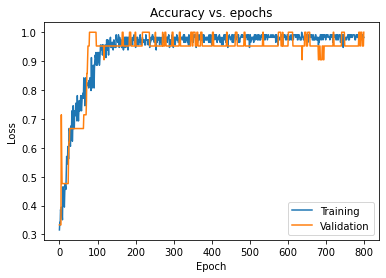

In [19]:
try:
    plt.plot(reg_history.history['accuracy'])
    plt.plot(reg_history.history['val_accuracy'])
except KeyError:
    plt.plot(reg_history.history['acc'])
    plt.plot(reg_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

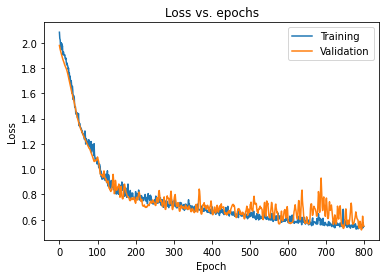

In [20]:
plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

We can see that the regularisation has helped to reduce the overfitting of the network.
You will now incorporate callbacks into a new training run that implements early stopping and learning rate reduction on plateaux.

Fill in the function below so that:

* It creates an `EarlyStopping` callback object and a `ReduceLROnPlateau` callback object
* The early stopping callback is used and monitors validation loss with the mode set to `"min"` and patience of 30.
* The learning rate reduction on plateaux is used with a learning rate factor of 0.2 and a patience of 20.

In [21]:
def get_callbacks():
    """
    This function should create and return a tuple (early_stopping, learning_rate_reduction) callbacks.
    The callbacks should be instantiated according to the above requirements.
    """
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=0, mode='min')
    learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=20)
    
    return early_stopping, learning_rate_reduction

Run the cell below to instantiate and train the regularised model with the callbacks.

In [22]:
call_model = get_regularised_model(train_data[0].shape, 0.3, 0.0001)
compile_model(call_model)
early_stopping, learning_rate_reduction = get_callbacks()
call_history = call_model.fit(train_data, train_targets, epochs=800, validation_split=0.15,
                         callbacks=[early_stopping, learning_rate_reduction], verbose=0)

In [23]:
learning_rate_reduction.patience

20

Finally, let's replot the accuracy and loss graphs for our new model.

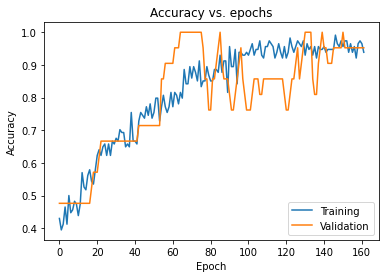

In [24]:
try:
    plt.plot(call_history.history['accuracy'])
    plt.plot(call_history.history['val_accuracy'])
except KeyError:
    plt.plot(call_history.history['acc'])
    plt.plot(call_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

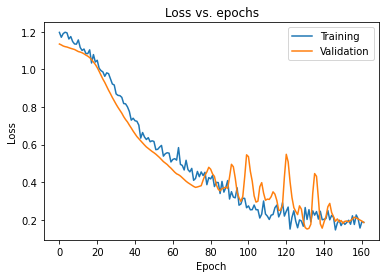

In [25]:
plt.plot(call_history.history['loss'])
plt.plot(call_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [26]:
test_loss, test_acc = call_model.evaluate(test_data, test_targets, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 0.275
Test accuracy: 86.67%
